year        school                                       
1998-01-01  Grammar schools (9 years of schooling)           66893.0
            Intermediate schools                             69148.0
            Orientation stages independent of school type     4808.0
            Primary schools                                  65167.0
            Schools with various courses of education        13191.0
                                                              ...   
2022-01-01  Intermediate schools                             34634.0
            Orientation stages independent of school type     1066.0
            Primary schools                                  14408.0
            Schools with various courses of education        19025.0
            Secondary general schools                        16123.0
Name: total, Length: 184, dtype: float64

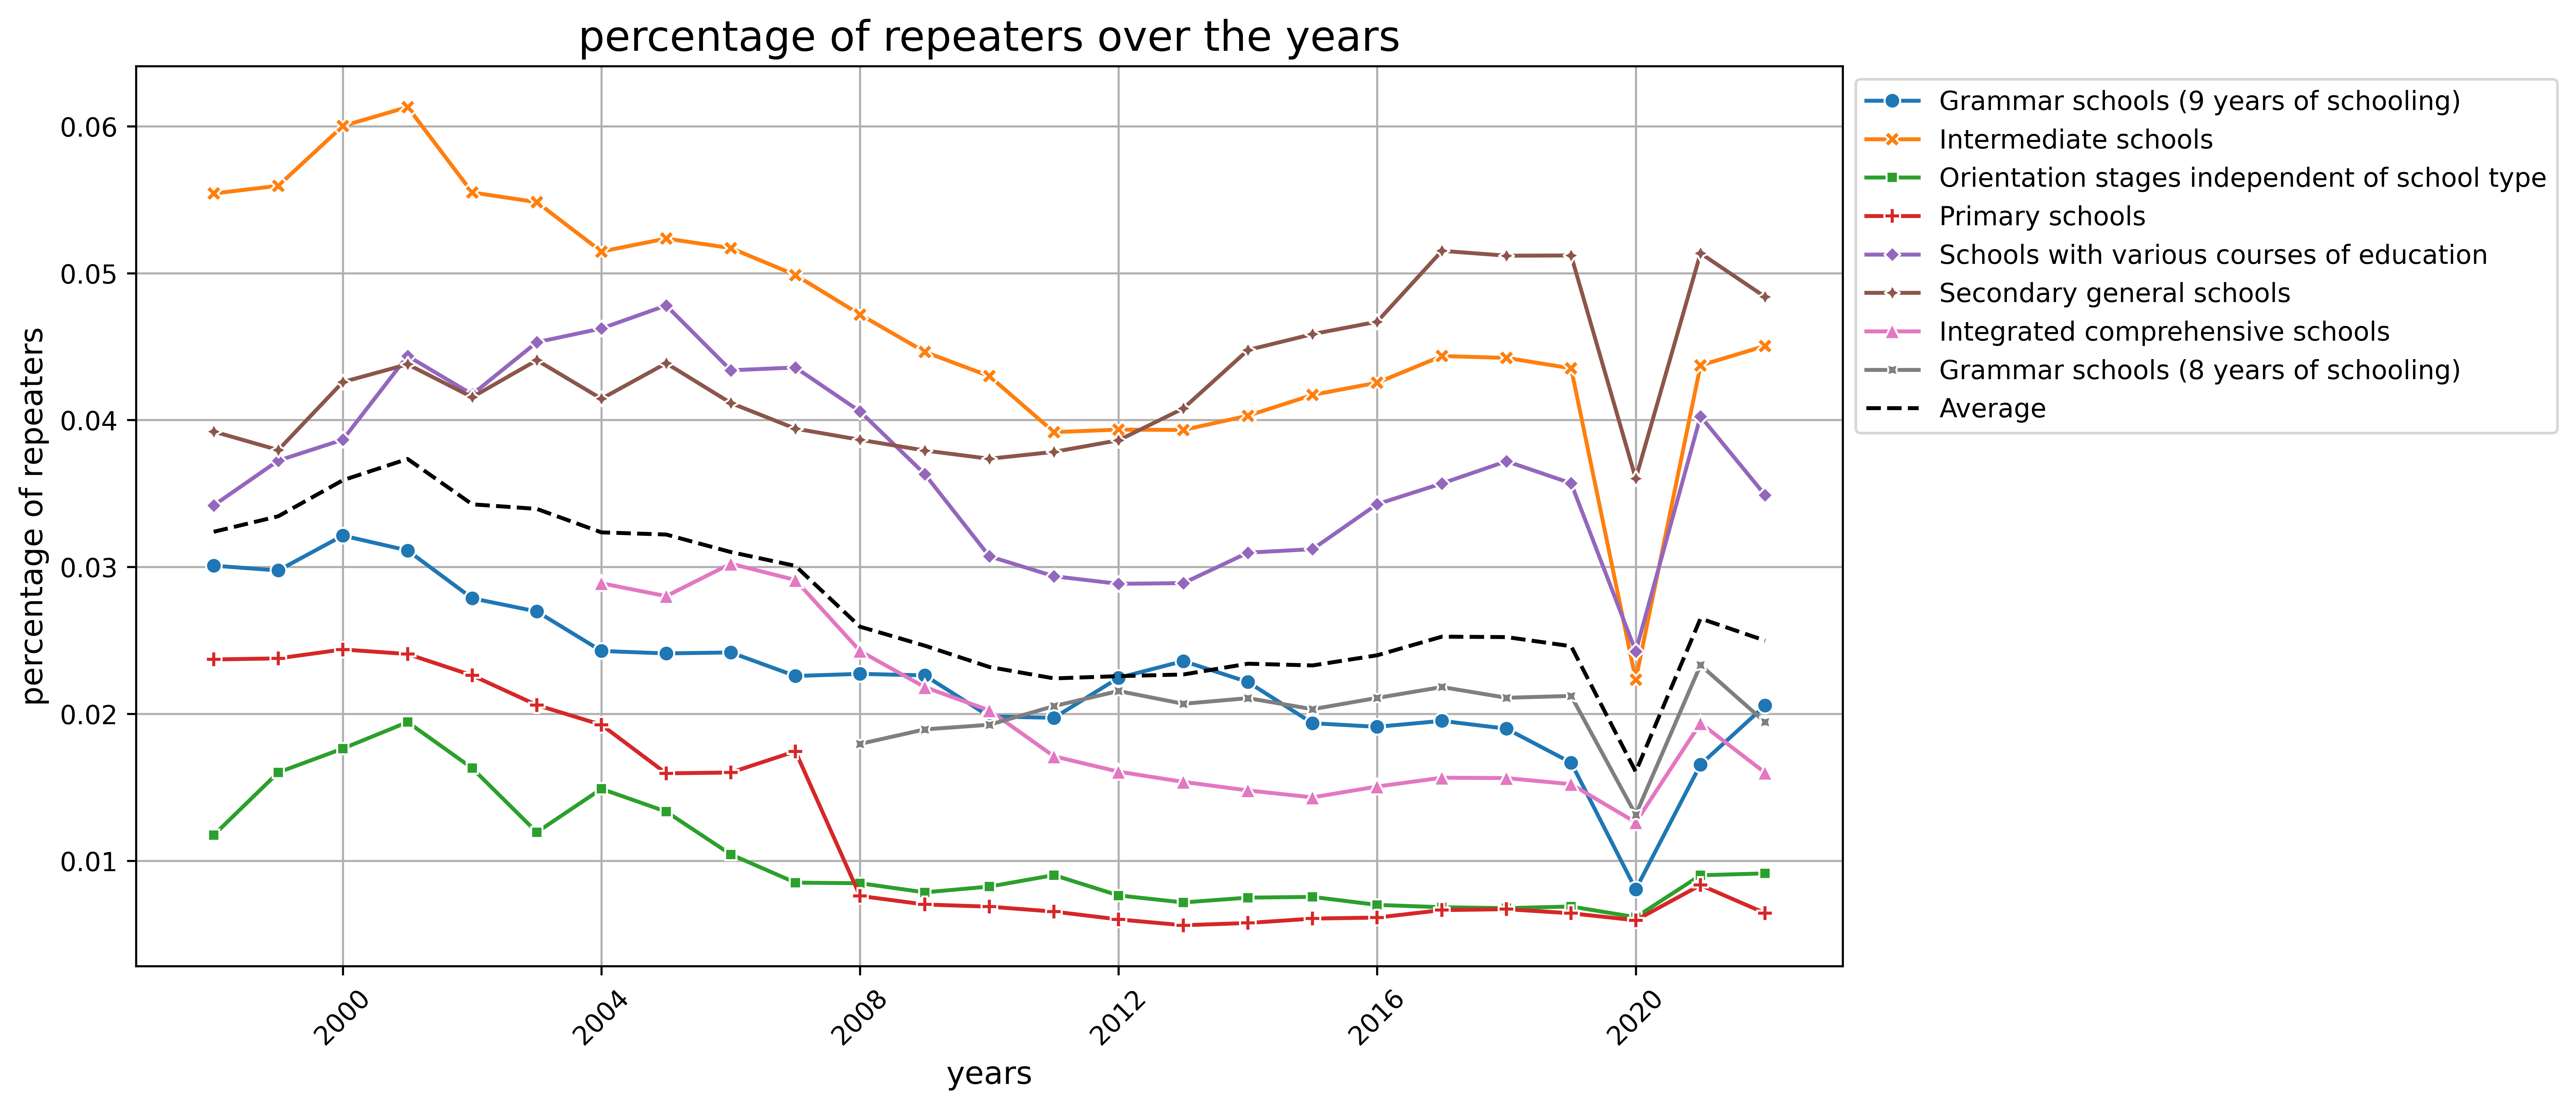

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from school_analysis.preprocessing.load import Loader
import pandas as pd


loader = Loader()
melted_df = loader.load('number_of_repeaters')
melted_df = melted_df.replace("-", np.nan)
melted_df = melted_df.dropna()


melted_df['year'] = pd.to_datetime(melted_df['year'], format='%Y')
melted_df['total'] = pd.to_numeric(melted_df['total'], errors='coerce')
total_over_years = melted_df.groupby(['year', 'school'])['total'].sum()
display(total_over_years)

children_type = loader.load("school-children-by-type")
children_type = children_type.rename(columns={
    "School Type": "school",
    "Year": "year",
})
children_type['year'] = pd.to_datetime(children_type['year'], format='%Y')
children_type['Students'] = pd.to_numeric(
    children_type['Students'], errors='coerce')
children_type = children_type[children_type["Gender"] == "Total"]
children_type = children_type.groupby(['year', 'school'])['Students'].sum()


df_repeaters = pd.merge(total_over_years, children_type, on=[
                        "year", "school"], how="inner").reset_index()
df_repeaters["relative"] = df_repeaters["total"] / df_repeaters["Students"]

average_per_year = df_repeaters.groupby(
    'year')['relative'].mean().reset_index()

# Setzen des Plots
plt.figure(figsize=(10, 6))

# Erstellen eines Plots für jede Schule
sns.lineplot(data=df_repeaters, x='year', y='relative',
             hue='school', style='school', markers=True, dashes=False)
sns.lineplot(data=average_per_year, x='year', y='relative',
             color='black', linestyle='--', label='Average')


plt.title('percentage of repeaters over the years', fontsize=16)
plt.xlabel('years', fontsize=12)
plt.ylabel('percentage of repeaters', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.show()

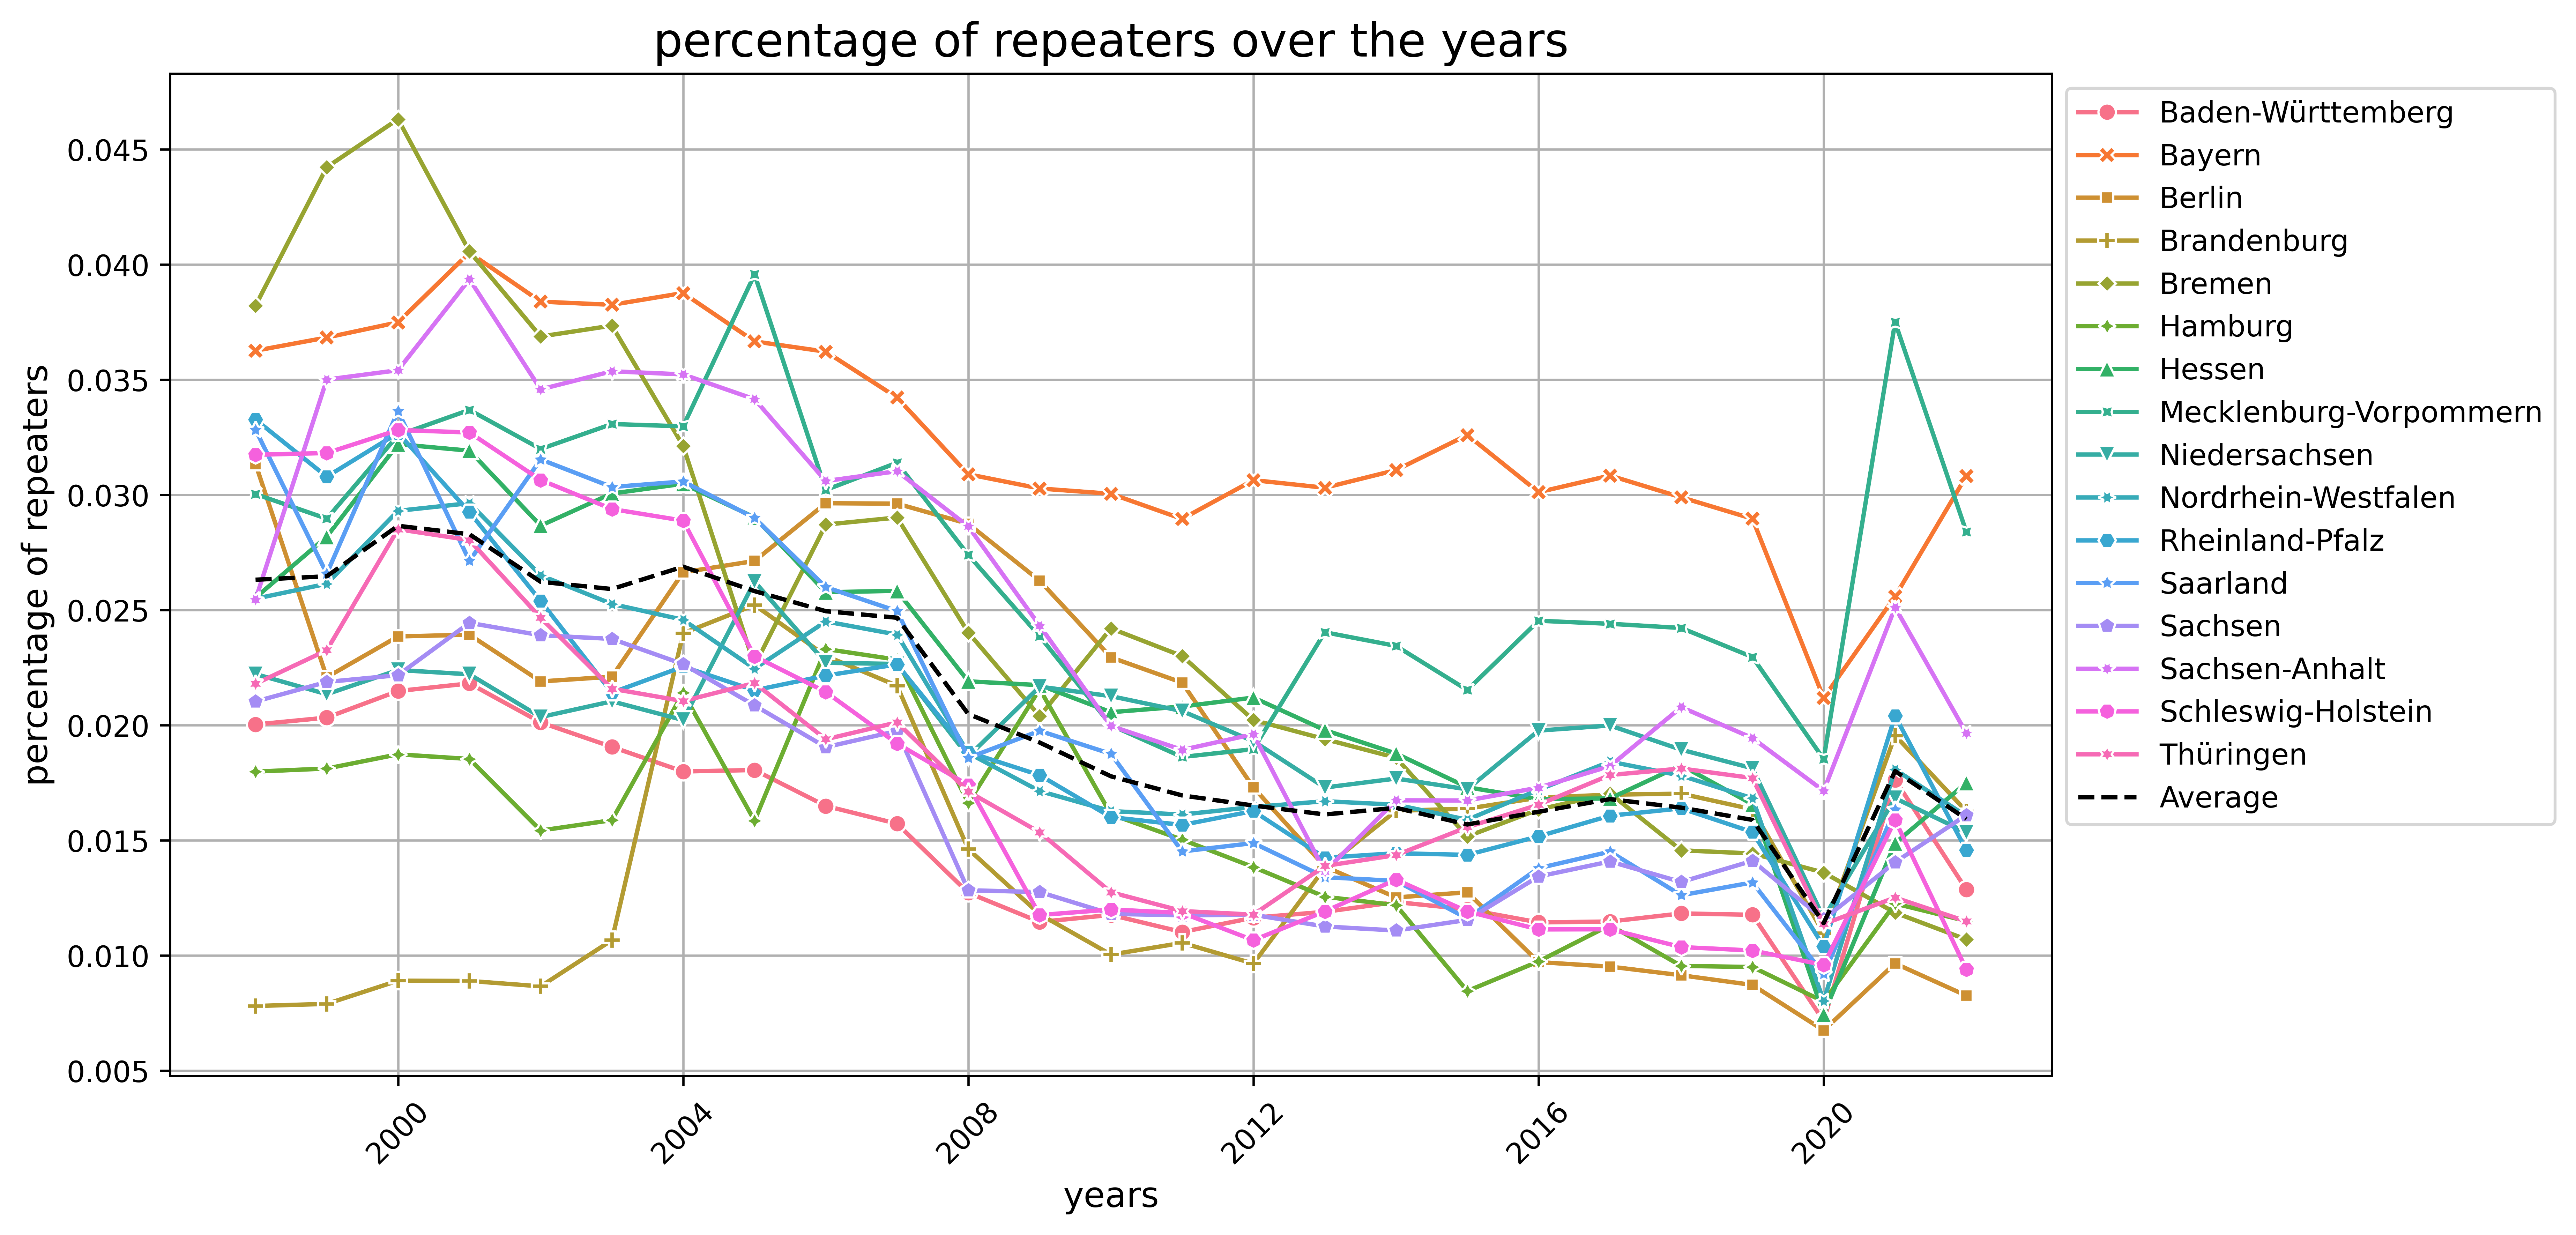

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from school_analysis.preprocessing.load import Loader
import pandas as pd


loader = Loader()
melted_df = loader.load('number_of_repeaters')


melted_df['year'] = pd.to_datetime(melted_df['year'], format='%Y')
melted_df['total'] = pd.to_numeric(melted_df['total'], errors='coerce')
total_over_years = melted_df.groupby(['year', 'state'])['total'].sum()

children_state = loader.load('school-children-by-state')
children_state = children_state.rename(columns={'Year': 'year'})
children_state = children_state.rename(
    columns={'Federal State': 'state', "Value": "Students"})
children_state['year'] = pd.to_datetime(children_state['year'], format='%Y')
children_state = children_state[
    (children_state["Gender"] == "all")
    & (children_state["Type"] == "Pupils")
    & (children_state["state"] != "Deutschland")
]
child_amount_per_year = children_state.groupby(['year', 'state'])[
    'Students'].sum()

df_repeaters = pd.merge(
    total_over_years, child_amount_per_year, on=['year', 'state'])
df_repeaters['relative'] = df_repeaters['total'] / \
    df_repeaters['Students']
df_repeaters


average_per_year = df_repeaters.groupby(
    'year')['relative'].mean().reset_index()

# Setzen des Plots
plt.figure(figsize=(10, 6))

# Erstellen eines Plots für jede Schule
sns.lineplot(data=df_repeaters, x='year', y='relative',
             hue='state', style='state', markers=True, dashes=False)
sns.lineplot(data=average_per_year, x='year', y='relative',
             color='black', linestyle='--', label='Average')


plt.title('percentage of repeaters over the years', fontsize=16)
plt.xlabel('years', fontsize=12)
plt.ylabel('percentage of repeaters', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.show()

In [20]:
temp = loader.load('number_of_repeaters')
temp

state                                     school  year  \
0      Baden-Württemberg     Grammar schools (9 years of schooling)  1998   
1      Baden-Württemberg     Grammar schools (9 years of schooling)  1998   
2      Baden-Württemberg     Grammar schools (9 years of schooling)  1998   
3      Baden-Württemberg     Grammar schools (9 years of schooling)  1998   
4      Baden-Württemberg     Grammar schools (9 years of schooling)  1998   
...                  ...                                        ...   ...   
11798          Thüringen  Schools with various courses of education  2022   
11799          Thüringen  Schools with various courses of education  2022   
11800          Thüringen  Schools with various courses of education  2022   
11801          Thüringen  Schools with various courses of education  2022   
11802          Thüringen  Schools with various courses of education  2022   

                                   grade  female   male   total  
0                               Grade 10   543.0  712.0  1255.0  
1        Grade 11 / Introductory phase E   411.0  535.0   946.0  
2      Grade 12 / Qualification phase Q1   245.0  321.0   566.0  
3      Grade 13 / Qualification phase Q2   155.0  203.0   358.0  
4                                Grade 5   124.0  164.0   288.0  
...                                  ...     ...    ...     ...  
11798                            Grade 6    37.0   45.0    82.0  
11799                            Grade 7    40.0   43.0    83.0  
11800                            Grade 8    59.0   95.0   154.0  
11801                            Grade 9   196.0  279.0   475.0  
11802                           Grade 10    64.0   71.0   135.0  

[11803 rows x 7 columns]